In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import pearsonr

In [235]:
import statsmodels.api as sm
from sklearn import preprocessing

In [236]:
beauty = pd.read_csv('../scratchpad/wards_beauty_score.csv')

In [237]:
solo_living = pd.read_csv('../scratchpad/wards_household_data.csv')

In [238]:
ward_data = pd.read_csv('../scratchpad/london_ward_imd_measures.csv')

In [239]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [240]:
len(solo_living)

8571

In [241]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [242]:
islingtonWards = solo_living[solo_living['Local authority name'] == 'Islington']['Ward code']

In [243]:
list(islingtonWards)

['E05000366',
 'E05000367',
 'E05000368',
 'E05000369',
 'E05000370',
 'E05000371',
 'E05000372',
 'E05000373',
 'E05000374',
 'E05000375',
 'E05000376',
 'E05000377',
 'E05000378',
 'E05000379',
 'E05000380',
 'E05000381']

In [244]:
solo_living['Persons per household'].unique()

array([2.20000005, 2.29999995, 2.0999999 , 2.4000001 , 2.70000005,
       2.        , 1.89999998, 2.5       , 2.5999999 , 2.9000001 ,
       3.5999999 , 3.20000005, 2.79999995, 3.29999995, 1.70000005,
       1.79999995, 3.0999999 , 3.        , 3.70000005, 3.5       ,
       3.4000001 , 1.60000002, 1.5       , 1.29999995, 3.79999995])

In [245]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [246]:
household_size

,Ward code,Persons per household
1,E05007955,2.2
2,E05007956,2.2
3,E05007957,2.3
4,E05007958,2.2
5,E05007959,2.2
...,...,...
8566,W05000279,2.3
8567,W05000280,2.1
8568,W05000281,2.2
8569,W05000912,2.4


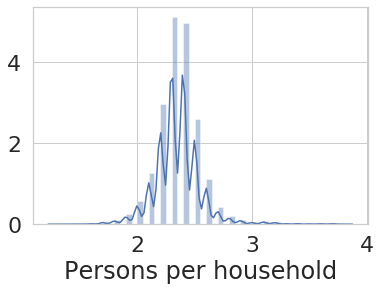

In [247]:
sns.distplot(solo_living['Persons per household'])

In [248]:
flickr = pd.read_csv('../scratchpad/Ward_Flicker_nature_tags.csv')

In [249]:
flickr[:4]

,Unnamed: 0,GSS_CODE,tag_count,nature_tags,diversity_tags,food_tags,emissions_tags,industry_tags,tobacco_tags,cleaning_tags,...,animals_tags,nature_tags_score,diversity_tags_score,food_tags_score,emissions_tags_score,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score
0,0,E05000026,32748,519,1,136,937,21,0,0,...,127,0.015848,0.000031,0.004153,0.028612,0.000641,0.000000,0.000000,0.000214,0.003878
1,1,E05000027,12155,1240,0,294,22,4,2,4,...,105,0.102016,0.000000,0.024188,0.001810,0.000329,0.000165,0.000329,0.000000,0.008638
2,2,E05000028,4706,174,0,10,22,0,0,0,...,43,0.036974,0.000000,0.002125,0.004675,0.000000,0.000000,0.000000,0.000000,0.009137
3,3,E05000029,6745,44,0,70,45,0,0,0,...,114,0.006523,0.000000,0.010378,0.006672,0.000000,0.000000,0.000000,0.000000,0.016901


In [250]:
beauty['ward_name'] = beauty['ward_name'].apply(lambda x: x.replace(' Ward',''))

In [251]:
len(beauty)

627

In [252]:
%store beauty

Stored 'beauty' (DataFrame)


In [253]:
beauty[:10]

,Unnamed: 0,ward_name,bscore
0,0,Chessington South,0.563107
1,1,Tolworth and Hook Rise,0.466667
2,2,Berrylands,0.741379
3,3,Alexandra,0.638554
4,4,Beverley,0.582278
5,5,Coombe Hill,0.503356
6,6,Chessington North and Hook,0.389610
7,7,Surbiton Hill,0.925373
8,8,Old Malden,0.675325
9,9,St. Mark's,0.745455


In [254]:
jsa = pd.read_csv('../scratchpad/Claimant_Count_Model_2015.csv')
jsa.head()

,GSS_CODE,WDNAME,OACODE,All ages,All ages.1,All ages.2,Age 18-24,Age 25-44,Age 45-64,Age 18-24.1,Age 25-44.1,Age 45-64.1,Age 18-24.2,Age 25-44.2,Age 45-64.2
0,E05000026,Abbey,00ABFX,6724.0,4061.0,2663.0,612.0,4756.0,1356.0,319.0,2857.0,885.0,293.0,1899.0,471.0
1,E05000027,Alibon,00ABFY,4877.0,2559.0,2318.0,564.0,2587.0,1726.0,304.0,1336.0,919.0,260.0,1251.0,807.0
2,E05000028,Becontree,00ABFZ,6401.0,3439.0,2962.0,731.0,3734.0,1936.0,383.0,2001.0,1055.0,348.0,1733.0,881.0
3,E05000029,Chadwell Heath,00ABGA,4577.0,2414.0,2163.0,579.0,2291.0,1707.0,299.0,1220.0,895.0,280.0,1071.0,812.0
4,E05000030,Eastbrook,00ABGB,5259.0,2796.0,2463.0,793.0,2358.0,2108.0,430.0,1261.0,1105.0,363.0,1097.0,1003.0


In [255]:
len(jsa)

681

In [256]:
# beauty_merged = pd.merge(jsa , beauty , left_on='WDNAME' , right_on='ward_name')
beauty_merged = jsa.copy()

In [257]:
len(beauty_merged)

681

In [258]:
# jsa_merged = pd.merge(beauty_merged , flickr , left_on='GSS_CODE' , right_on='GSS_CODE')
jsa_merged = jsa.copy()

In [259]:
len(jsa_merged)

681

In [260]:
income = pd.read_csv('../scratchpad/modelled-household-income-estimates-wards.csv', engine='python')
for column in income.columns: 
    income[column] =  income[column].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    income[column] =  income[column].apply(lambda x: x.replace(',',''))
merged_socio_1 = pd.merge(income,jsa,left_on='Code' , right_on='GSS_CODE')
merged_socio = pd.merge(merged_socio_1,household_size,left_on='Code' , right_on='Ward code')
# selected_socio = merged_socio[['GSS_CODE','Persons per household','All ages','Median 2012/13' , 'bscore' ,'nature_tags_score',
#        'diversity_tags_score', 'food_tags_score', 'emissions_tags_score',
#        'industry_tags_score', 'tobacco_tags_score', 'cleaning_tags_score',
#        'waste_tags_score', 'animals_tags_score']]
selected_socio = merged_socio[['GSS_CODE','Persons per household','All ages','Median 2012/13']]

selected_socio = selected_socio.rename(columns={'All ages':'All_jsa'})

In [261]:
len(merged_socio)

624

In [262]:
selected_socio.head()

,GSS_CODE,Persons per household,All_jsa,Median 2012/13
0,E05000026,2.8,6724.0,33920
1,E05000027,2.6,4877.0,32470
2,E05000028,2.7,6401.0,33000
3,E05000029,2.5,4577.0,33920
4,E05000030,2.6,5259.0,37400


In [263]:
# Ward_IMD = json.load(open('../scratchpad/Ward_index_deprivation.json'))
Ward_IMD = pd.read_csv('../scratchpad/london_ward_imd_measures.csv')

In [264]:
ward_data = pd.read_csv('../scratchpad/london_ward_imd_measures.csv')
ward_data=ward_data[['Ward Code','IMD average score']]
wardDf = ward_data.rename(columns={"Ward Code": "GSS_CODE", "IMD average score": "IMD"})

In [265]:

# ward = {'GSS_CODE': [] , 'IMD' : []}
# for k in Ward_IMD:
#     ward['GSS_CODE'].append(k)
#     ward['IMD'].append(Ward_IMD[k])
# wardDf = pd.DataFrame.from_dict(ward)

theData = pd.read_csv('../scratchpad/Merged_all_disease_green_sat.csv')

In [266]:
len(theData)

424

In [267]:
third_places = pd.read_csv('../scratchpad/ward_third_places_ordinance_survey.csv')

In [268]:
third_places.head()

,Unnamed: 0,GSS_CODE,third_places
0,0,E05000026,783
1,1,E05000027,244
2,2,E05000028,315
3,3,E05000029,339
4,4,E05000030,371


In [269]:
data_0 = wardDf

In [270]:
data_1 = pd.merge(theData,data_0,left_on='GSS_CODE' , right_on='GSS_CODE')

In [271]:
len(data_1)

424

In [272]:
data_2 = pd.merge(data_1,selected_socio,left_on='GSS_CODE' , right_on='GSS_CODE')

In [273]:
# TreeScore = pd.read_csv('../scratchpad/Revised_tree_score.csv')

In [274]:
# data = pd.merge(data_2,TreeScore,left_on='GSS_CODE' , right_on='borough_name')
data = data_2

In [275]:
len(data)

424

In [276]:
data['All_jsa'] = data['All_jsa']/data['population']
data['Sex_ratio'] = data['male']/data['female']

In [277]:
data.to_csv('All_data_aggregated_ward_level_v2.csv')

In [278]:
# data['third_places'] = data['third_places']/data['population']

In [279]:
data.head()

,Unnamed: 0,green_score,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,LCM_grass_pct,LCM_tree_pct,LCM_urban_pct,UA_Public Greenery PCT,UA_Forests PCT,...,Population,Hectares,Square_Kilometres,Population_per_hectare,Population_per_square_kilometre,IMD,Persons per household,All_jsa,Median 2012/13,Sex_ratio
0,0,8.91957,E05000420,E05000420,0.142967,0.000000,0.000000,1.000000,0.039482,0.0,...,17720,120.8,1.208,146.688742,14668.874170,35.9,2.3,0.557674,32220,0.983525
1,1,41.70052,E05000571,E05000571,0.391747,0.095716,0.030845,0.734149,0.314715,0.0,...,12338,205.5,2.055,60.038929,6003.892944,25.4,2.5,0.530168,32330,0.933078
2,2,18.26981,E05000570,E05000570,0.112290,0.048426,0.007533,0.898305,0.019456,0.0,...,10849,171.9,1.719,63.112275,6311.227458,15.2,2.2,0.509148,37960,0.909381
3,3,27.56138,E05000572,E05000572,0.254884,0.136226,0.015136,0.828456,0.197242,0.0,...,12463,195.7,1.957,63.684211,6368.421053,9.4,2.5,0.510026,40610,0.966677
4,4,41.44914,E05000620,E05000620,0.273367,0.033396,0.014513,0.754370,0.192175,0.0,...,16545,320.8,3.208,51.574190,5157.418953,23.7,2.1,0.618008,39580,0.951631


In [280]:
list(data.columns)

['Unnamed: 0',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions',

In [281]:
# data['f_alcohol'] = data['f_wine'] + data['f_beer'] + data['f_spirits']

In [282]:
pearsonr(data['weight'],data['Persons per household'])

(0.4370397966850764, 3.3187879657388883e-21)

In [283]:
pearsonr(data['weight'],data['depression_Prevalence'])

(-0.4406078640440296, 1.4525544276327119e-21)

In [284]:
pearsonr(data['Persons per household'],data['depression_Prevalence'])

(-0.3167277873924176, 2.4690673744434468e-11)

In [285]:
pearsonr(data['h_nutrients_calories_norm'],data['depression_Prevalence'])

(0.212393334941387, 1.0291241871070937e-05)

In [286]:
pearsonr(data['Sex_ratio'],data['depression_Prevalence'])

(-0.299944997620418, 2.905585224583218e-10)

In [287]:
pearsonr(data['avg_age'],data['depression_Prevalence'])

(0.26305028869774205, 3.84857349770338e-08)

In [288]:
pearsonr(data['weight'],data['Persons per household'])

(0.4370397966850764, 3.3187879657388883e-21)

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


370.6409457871175 48.03033907834427 255.95561784407693 513.5569448765766


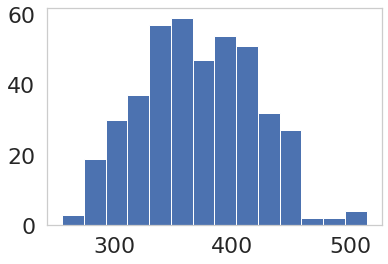

In [291]:
sns.distplot(data['weight'], hist_kws=dict(alpha=1),kde=False,axlabel = '')
plt.grid(False)
plt.axes()
print(np.mean(data['weight']),np.std(data['weight']),np.min(data['weight']),np.max(data['weight']))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


0.6762269325159898 0.010937518283535652 0.6247637702848471 0.7069281086520738


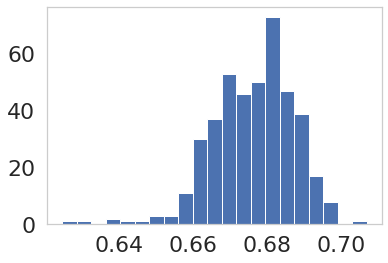

In [292]:
sns.distplot(data['h_nutrients_calories_norm'], hist_kws=dict(alpha=1),kde=False,axlabel = '')
plt.grid(False)
plt.axes()
print(np.mean(data['h_nutrients_calories_norm']),np.std(data['h_nutrients_calories_norm']),np.min(data['h_nutrients_calories_norm']),np.max(data['h_nutrients_calories_norm']))

In [289]:
# data.to_csv('All_data_aggregated_ward_level.csv')

In [290]:
%store -r Ward_estimates

In [144]:
Ward_estimates.head()

,WardCode,Household
0,E05000026,0.411168
1,E05000027,0.443478
2,E05000028,0.440901
3,E05000029,0.467480
4,E05000030,0.458647


In [145]:
subset = data[['h_nutrients_calories_norm','GSS_CODE','depression_Prevalence','borough_name_y']].copy()
merged_solo_subset = pd.merge(Ward_estimates,subset , left_on='WardCode', right_on='GSS_CODE')
merged_solo_subset.head()

,WardCode,Household,h_nutrients_calories_norm,GSS_CODE,depression_Prevalence,borough_name_y
0,E05000026,0.411168,0.660005,E05000026,2.536093,E05000026
1,E05000027,0.443478,0.663760,E05000027,5.088617,E05000027
2,E05000028,0.440901,0.667451,E05000028,4.006256,E05000028
3,E05000029,0.467480,0.652409,E05000029,6.112272,E05000029
4,E05000030,0.458647,0.663478,E05000030,4.216100,E05000030


In [146]:
islington = merged_solo_subset[merged_solo_subset['WardCode'].isin(islingtonWards)].copy()

In [147]:
islington

,WardCode,Household,h_nutrients_calories_norm,GSS_CODE,depression_Prevalence,borough_name_y
240,E05000366,0.438559,0.685141,E05000366,6.819278,E05000366
241,E05000367,0.426328,0.689787,E05000367,6.782704,E05000367
242,E05000368,0.393851,0.692468,E05000368,5.831055,E05000368
243,E05000369,0.397324,0.686127,E05000369,7.861621,E05000369
244,E05000370,0.464286,0.687931,E05000370,9.673954,E05000370
245,E05000371,0.381343,0.679431,E05000371,7.305479,E05000371
246,E05000372,0.433744,0.693525,E05000372,8.466857,E05000372
247,E05000373,0.440953,0.688575,E05000373,7.708375,E05000373
248,E05000374,0.376636,0.686638,E05000374,5.487071,E05000374
249,E05000375,0.421751,0.683395,E05000375,6.543647,E05000375


In [148]:
np.median(islington['Household'])

0.4217506631299735

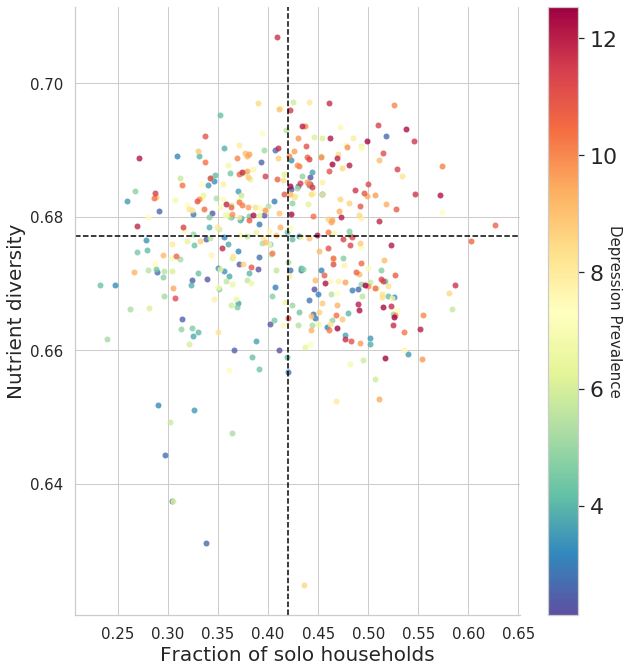

In [149]:
sns.set_style("whitegrid")
g= sns.lmplot( x='Household', y='h_nutrients_calories_norm', data=merged_solo_subset, fit_reg=False, hue='depression_Prevalence', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]

scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(merged_solo_subset['depression_Prevalence']), vmax=min(merged_solo_subset['depression_Prevalence'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Depression Prevalence', rotation=270, fontsize = 15)

ax.axhline(np.median(merged_solo_subset['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(merged_solo_subset['Household']), ls='--',color='black')
ax.set_xlabel("Fraction of solo households",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)

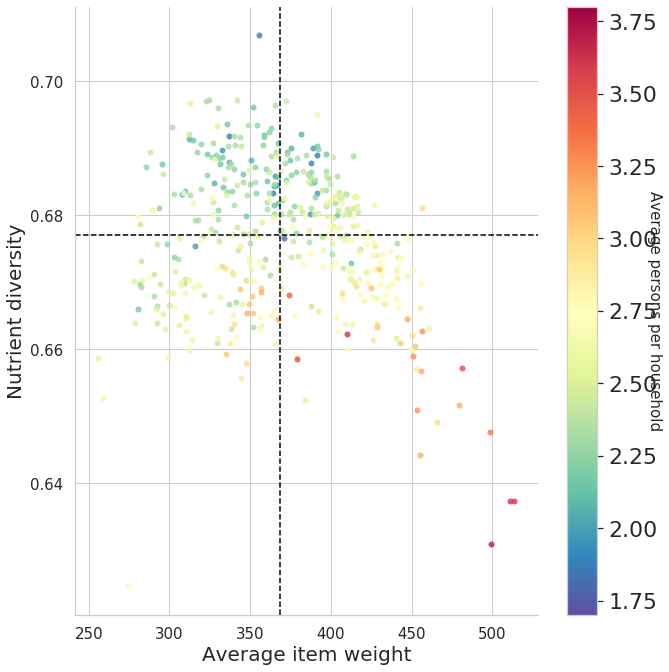

In [150]:
sns.set_style("whitegrid")
g= sns.lmplot( x='weight', y='h_nutrients_calories_norm', data=data, fit_reg=False, hue='Persons per household', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]

scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['Persons per household']), vmax=min(data['Persons per household'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Average persons per household', rotation=270, fontsize = 15)

ax.axhline(np.median(data['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(data['weight']), ls='--',color='black')
ax.set_xlabel("Average item weight",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)


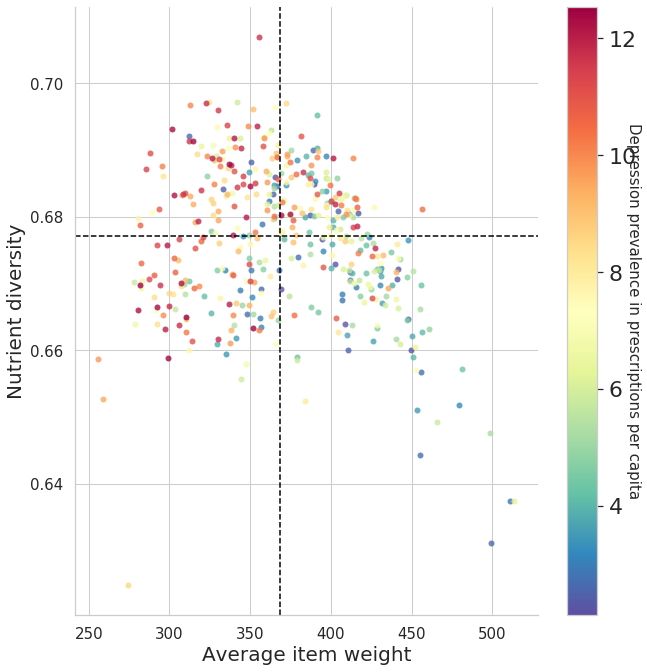

In [151]:
sns.set_style("whitegrid")
g = sns.lmplot( x='weight', y='h_nutrients_calories_norm', data=data, fit_reg=False, hue='depression_Prevalence', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]
scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['depression_Prevalence']), vmax=min(data['depression_Prevalence'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Depression prevalence in prescriptions per capita', rotation=270, fontsize = 15)
ax.axhline(np.median(data['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(data['weight']), ls='--',color='black')
ax.set_xlabel("Average item weight",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)



In [152]:
data['quantile_Sex_ratio'] = pd.qcut(data['Sex_ratio'], q=4, labels =["1st" , "2nd" , "3rd", "4th"])
data['quantile_avg_age'] = pd.qcut(data['avg_age'], q=4 , labels = ["1st" , "2nd" , "3rd", "4th"])

In [233]:
data['quantile_Sex_ratio'].unique()

KeyError: 'quantile_Sex_ratio'

In [154]:
# data.to_csv('SoloLiving_causal_ForAdam.csv')

In [155]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'All_jsa','Median 2012/13','Persons per household']
# nutrient = ['transaction_days' , 'weight' ,'num_transactions']
nutrient  = [ 'weight', 'h_nutrients_calories_norm']
green = []
Flickr = []

X_public = ['UA_Public Greenery PCT']       
X_private = ['StreetTrees_PCT']

control = ['LCM_urban_pct']

Y_green = ['GLUD_Area of Greenspace PCT']

X_dims_green = X_private + X_public + control

X_dims =  socio_economic + nutrient

# X_solo = nutrient + ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','Median 2012/13']
# X_solo = nutrient + ['people_per_sq_km']
# X_solo = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','Median 2012/13']
X_solo = nutrient
Y_solo = ['Persons per household']

X_dims_2 = socio_economic + nutrient + green +  Flickr 

print(X_dims , X_dims_2)
Y_dims = ['Persons per household']
tree_dims =['TreeScore','GLUD_Area of Greenspace PCT','LCM_tree_pct','LCM_urban_pct','UA_Public Greenery PCT','StreetTrees_PCT']
min_max_scaler = preprocessing.MinMaxScaler() 
X_green_model = np.array(data[X_dims_green].values,dtype=np.float32)
Y_green_model = np.array(data[Y_green].values,dtype=np.float32)

X_green_model = min_max_scaler.fit_transform(X_green_model)
Y_green_model = min_max_scaler.fit_transform(Y_green_model)

X = np.array(data[X_dims].values,dtype=np.float32)
X_2= np.array(data[X_dims_2].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)

X_prime = np.array(data[tree_dims].values,dtype=np.float32)
X = min_max_scaler.fit_transform(X)
X2 = min_max_scaler.fit_transform(X_2)
Y = min_max_scaler.fit_transform(Y)

['avg_age', 'IMD', 'people_per_sq_km', 'All_jsa', 'Median 2012/13', 'Persons per household', 'weight', 'h_nutrients_calories_norm'] ['avg_age', 'IMD', 'people_per_sq_km', 'All_jsa', 'Median 2012/13', 'Persons per household', 'weight', 'h_nutrients_calories_norm']


In [156]:
interaction_factors = [('weight','avg_age'),('weight','people_per_sq_km'),('weight','Sex_ratio'),('weight','Median 2012/13'),
                       ('h_nutrients_calories_norm','Median 2012/13'),
                       ('avg_age','IMD'),('avg_age','people_per_sq_km'),('avg_age','IMD'),('avg_age','Sex_ratio'),('avg_age','Median 2012/13'),
                       ('people_per_sq_km','IMD'),
                       ('people_per_sq_km','Sex_ratio')
                      ]

[Text(0, 0.5, 'Average item weight'), Text(0, 1.5, 'Nutrient Diversity')]

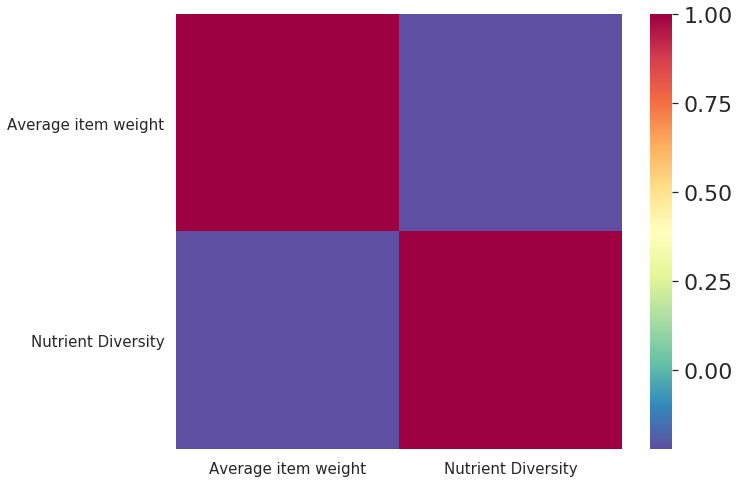

In [157]:
solo = data[X_solo].astype('float32', copy=True)
solo.rename(columns={'h_nutrients_calories_norm':'Nutrient Diversity',
                          'weight':'Average item weight',
                          'avg_age':'Average age' , 'people_per_sq_km':'Population density' , 'Median 2012/13':'Median Income'}, 
                 inplace=True)
fig, ax = plt.subplots(figsize=(10,8))         
corr = solo.corr(method='pearson')
sns.heatmap(corr, annot=False , ax=ax ,cmap='Spectral_r' )
ax.set_xticklabels(corr.columns, fontsize=15)
ax.set_yticklabels(corr.columns, fontsize=15)


In [158]:
print(X_solo)
Xframesolo = data[X_solo].astype('float32', copy=True)
# for factor in interaction_factors:
#     Xframesolo[factor[0] + '_' + factor[1]] = Xframesolo[factor[0]]* Xframesolo[factor[1]]
            
print(Xframesolo.columns)


['weight', 'h_nutrients_calories_norm']
Index(['weight', 'h_nutrients_calories_norm'], dtype='object')


In [74]:
# Xframesolo_2 = Xframesolo[['h_nutrients_calories_norm', 'weight']]
# Xframesolo_2 = Xframesolo

In [75]:
# pearsonr(Xframesolo['weight'], Xframesolo['h_nutrients_calories_norm'])

In [159]:
y_plot = np.array(data[Y_dims].values,dtype=np.float32)
Ysolo = min_max_scaler.fit_transform(np.array(data[Y_dims].values,dtype=np.float32))
# Ysolo = np.array(data[Y_dims].values,dtype=np.float32)
Xframesolo = min_max_scaler.fit_transform(np.array(data[X_solo].astype('float32', copy=True)))
# Xframesolo = np.array(Xframesolo_2.values,dtype=np.float32)
Xframesolo = sm.add_constant(Xframesolo)
print(X_solo)
model_solo = sm.OLS(Ysolo, Xframesolo).fit()
model_solo.summary()


['weight', 'h_nutrients_calories_norm']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           1.24e-75
Time:                        16:23:57   Log-Likelihood:                 354.29
No. Observations:                 424   AIC:                            -702.6
Df Residuals:                     421   BIC:                            -690.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7321      0.030     24.007      0.000       0.672       0.792
x1             0.2529      0.028      8.991      0.000       0.198       0.308
x2            -0.7391      0.039    -18.757      0.000      -0.817      -0.662
==============================================================================
Omnibus:                       20.123   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.297
Skew:                           0.296   Prob(JB):                     1.31e-08
Kurtosis:                       4.306   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
Xframesolo.shape

(424, 3)

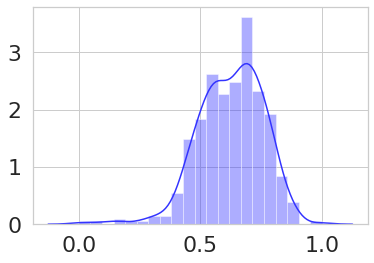

In [161]:
sns.distplot(Xframesolo[:,2])

In [162]:
Ysolo.shape

(424, 1)

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


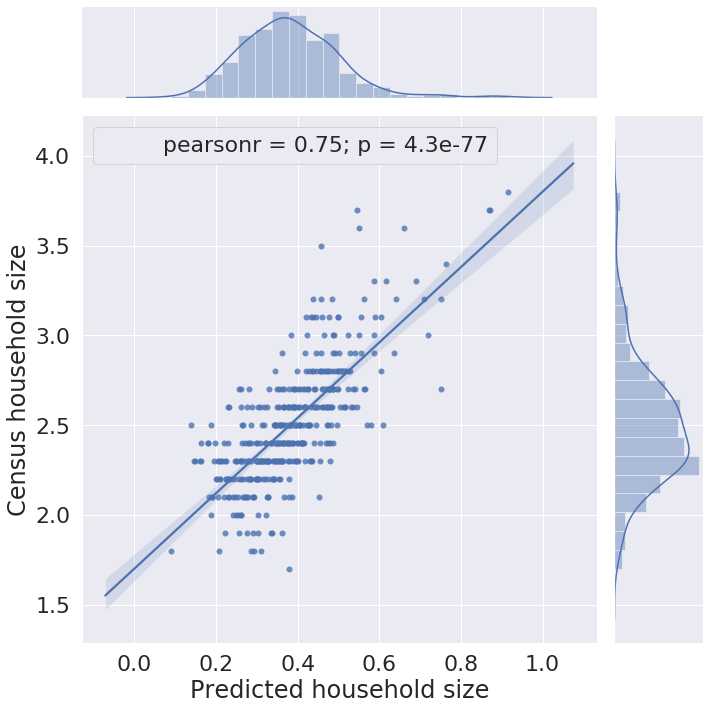

In [163]:
predictions_solo= model_solo.predict(Xframesolo)
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_solo, y=y_plot[:,0], kind='regression',height=10);
plt.xlabel('Predicted household size')
plt.ylabel('Census household size')
ax.annotate(pearsonr)

In [164]:
features_to_normalize = ['h_nutrients_calories_norm', 'weight']
data[features_to_normalize] = data[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [165]:
data['Predicted_household'] = 4*(0.7283 - 0.6502*data['h_nutrients_calories_norm'] + 0.2582*data['weight'])

In [166]:
list(data.columns)

['Unnamed: 0',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions',

In [167]:
Solo_predicted_df  =  data[['GSS_CODE','h_nutrients_calories_norm' ,'weight','Predicted_household','avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','All_jsa','Median 2012/13','Persons per household']].copy()

In [168]:
Solo_predicted_df.head()

,GSS_CODE,h_nutrients_calories_norm,weight,Predicted_household,avg_age,IMD,people_per_sq_km,Sex_ratio,All_jsa,Median 2012/13,Persons per household
0,E05000420,0.621350,0.717053,2.037767,33.195192,35.9,14246.666667,0.983525,0.557674,32220,2.3
1,E05000571,0.571767,0.183695,1.615867,34.208704,25.4,5918.048780,0.933078,0.530168,32330,2.5
2,E05000570,0.546861,0.100694,1.594921,40.219281,15.2,6259.883721,0.909381,0.509148,37960,2.2
3,E05000572,0.552541,0.086853,1.565854,37.033810,9.4,6597.948718,0.966677,0.510026,40610,2.5
4,E05000620,0.786335,0.452839,1.335794,35.017963,23.7,6087.197232,0.951631,0.618008,39580,2.1


In [169]:
pearsonr(Solo_predicted_df['Predicted_household'] , Solo_predicted_df['Persons per household'])

(0.7469226126687133, 8.339535220862567e-77)

In [170]:
Solo_predicted_df.to_csv('Adam_updated_solo_living.csv')

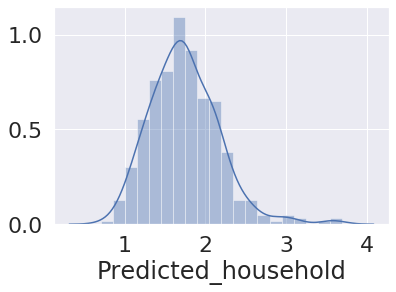

In [171]:
sns.distplot(data['Predicted_household'])

In [172]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','Median 2012/13','Predicted_household']
Y_dep = ['depression_Prevalence']
Ydep = min_max_scaler.fit_transform(np.array(data[Y_dep].values,dtype=np.float32))
Xdep = min_max_scaler.fit_transform(np.array(data[socio_economic].values,dtype=np.float32))
Xdep = sm.add_constant(Xdep)
model_dep = sm.OLS(Ydep, Xdep).fit()
model_dep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     19.77
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           2.42e-20
Time:                        16:25:09   Log-Likelihood:                 278.47
No. Observations:                 424   AIC:                            -542.9
Df Residuals:                     417   BIC:                            -514.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4981      0.061      8.161      0.000       0.378       0.618
x1             0.1604      0.050      3.178      0.002       0.061       0.260
x2            -0.0303      0.057     -0.534      0.594      -0.142       0.081
x3             0.1137      0.043      2.669      0.008       0.030       0.198
x4            -0.2239      0.056     -4.015      0.000      -0.334      -0.114
x5            -0.2616      0.099     -2.647      0.008      -0.456      -0.067
x6            -0.3652      0.059     -6.152      0.000      -0.482      -0.249
==============================================================================
Omnibus:                       28.230   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.684
Skew:                           0.520   Prob(JB):                     3.98e-09
Kurtosis:                       4.053   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

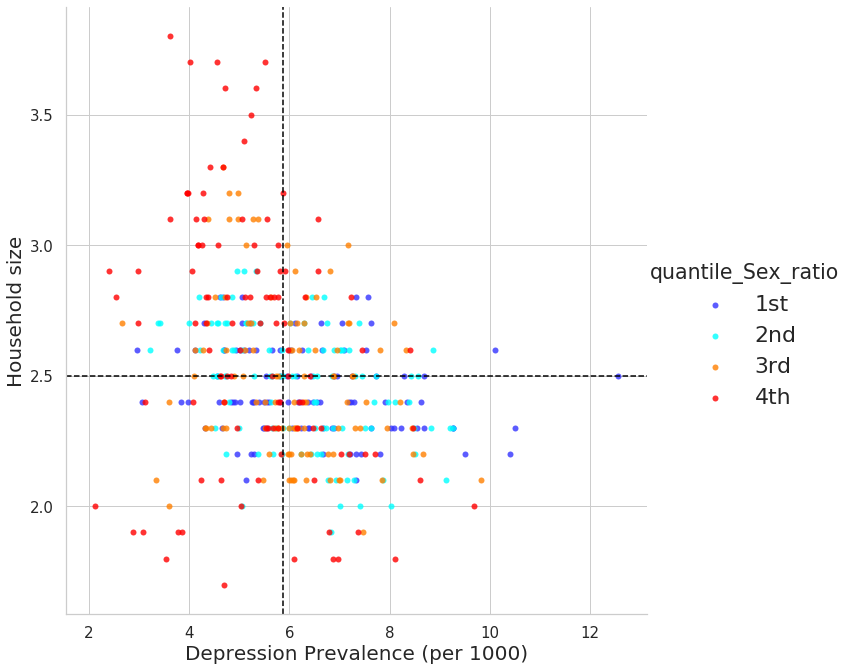

In [90]:
sns.set_style("whitegrid")
flatui = ["#3333FF", "#00FFFF", "#FF8000" , "#FF0000"]
sns.set_palette(flatui)
g= sns.lmplot( x='depression_Prevalence', y='Persons per household', data=data, fit_reg=False, hue='quantile_Sex_ratio', legend=True,height=10)
ax = g.axes[0][0]

# scalarmap = plt.cm.ScalarMappable(cmap='Set1', norm=plt.Normalize(vmin=max(data['quantile_Sex_ratio']), vmax=min(data['quantile_Sex_ratio'])))
# cbar = plt.colorbar(scalarmap)
# cbar.set_label('Sex Ratio Quantile', rotation=270, fontsize = 15)

ax.axhline(np.median(data['Persons per household']), ls='--',color='black')
ax.axvline(np.median(data['depression_Prevalence']), ls='--',color='black')
ax.set_xlabel("Depression Prevalence (per 1000)",fontsize=20)
ax.set_ylabel("Household size",fontsize=20)
ax.tick_params(labelsize=15)

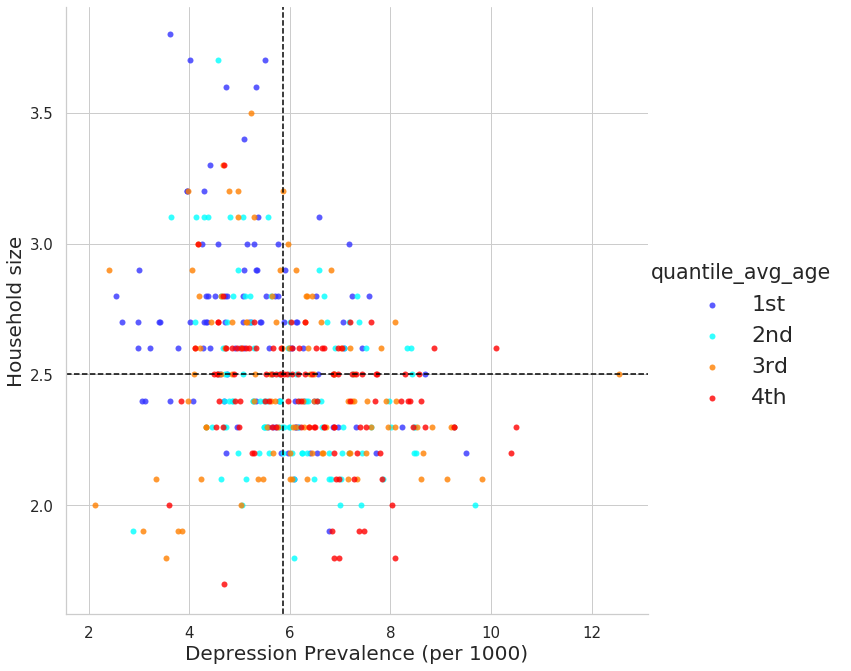

In [91]:
sns.set_style("whitegrid")
flatui = ["#3333FF", "#00FFFF", "#FF8000" , "#FF0000"]
sns.set_palette(flatui)
g= sns.lmplot( x='depression_Prevalence', y='Persons per household', data=data, fit_reg=False, hue='quantile_avg_age', legend=True ,height=10)
ax = g.axes[0][0]

# scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['IMD']), vmax=min(data['avg_age'])))
# cbar = plt.colorbar(scalarmap)
# cbar.set_label('IMD', rotation=270, fontsize = 15)

ax.axhline(np.median(data['Persons per household']), ls='--',color='black')
ax.axvline(np.median(data['depression_Prevalence']), ls='--',color='black')
ax.set_xlabel("Depression Prevalence (per 1000)",fontsize=20)
ax.set_ylabel("Household size",fontsize=20)
ax.tick_params(labelsize=15)

In [92]:
X_green_model = sm.add_constant(X_green_model)

In [93]:
print(X_dims_green)

['StreetTrees_PCT', 'UA_Public Greenery PCT', 'LCM_urban_pct']


In [94]:
X = sm.add_constant(X)
X2 = sm.add_constant(X2)

In [95]:
X.shape

(424, 9)

In [96]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [97]:
model_2 = sm.OLS(Y, X2).fit()
predictions_2 = model_2.predict(X2)

In [98]:
model_green = sm.OLS(Y_green_model, X_green_model).fit()
predictions_green = model_green.predict(X_green_model)

In [99]:
model_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     345.5
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          5.43e-113
Time:                        13:41:45   Log-Likelihood:                 338.14
No. Observations:                 424   AIC:                            -668.3
Df Residuals:                     420   BIC:                            -652.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8217      0.029     28.646      0.000       0.765       0.878
x1             0.0141      0.068      0.206      0.837      -0.120       0.149
x2             0.1451      0.034      4.266      0.000       0.078       0.212
x3            -0.7225      0.029    -25.072      0.000      -0.779      -0.666
==============================================================================
Omnibus:                      111.022   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.295
Skew:                          -1.228   Prob(JB):                     4.64e-70
Kurtosis:                       6.469   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.633e+30
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:46   Log-Likelihood:                 14092.
No. Observations:                 424   AIC:                        -2.817e+04
Df Residuals:                     415   BIC:                        -2.813e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-16    5.7e-16      0.584      0.559   -7.87e-16    1.45e-15
x1                  0   3.23e-16          0      1.000   -6.35e-16    6.35e-16
x2         -1.665e-16   3.75e-16     -0.444      0.658   -9.04e-16    5.71e-16
x3         -4.059e-16    4.8e-16     -0.846      0.398   -1.35e-15    5.37e-16
x4         -5.274e-16   3.85e-16     -1.368      0.172   -1.28e-15     2.3e-16
x5         -1.665e-16   5.64e-16     -0.295      0.768   -1.27e-15    9.41e-16
x6             1.0000   4.42e-16   2.26e+15      0.000       1.000       1.000
x7         -1.027e-15   3.08e-16     -3.338      0.001   -1.63e-15   -4.22e-16
x8         -1.943e-16    5.4e-16     -0.360      0.719   -1.26e-15    8.67e-16
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.311
Skew:                           0.066   Prob(JB):                        0.856
Kurtosis:                       2.993   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
X_dims_2

['avg_age',
 'IMD',
 'people_per_sq_km',
 'All_jsa',
 'Median 2012/13',
 'Persons per household',
 'weight',
 'h_nutrients_calories_norm']

In [224]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.633e+30
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:20:41   Log-Likelihood:                 14092.
No. Observations:                 424   AIC:                        -2.817e+04
Df Residuals:                     415   BIC:                        -2.813e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-16    5.7e-16      0.584      0.559   -7.87e-16    1.45e-15
x1                  0   3.23e-16          0      1.000   -6.35e-16    6.35e-16
x2         -1.665e-16   3.75e-16     -0.444      0.658   -9.04e-16    5.71e-16
x3         -4.059e-16    4.8e-16     -0.846      0.398   -1.35e-15    5.37e-16
x4         -5.274e-16   3.85e-16     -1.368      0.172   -1.28e-15     2.3e-16
x5         -1.665e-16   5.64e-16     -0.295      0.768   -1.27e-15    9.41e-16
x6             1.0000   4.42e-16   2.26e+15      0.000       1.000       1.000
x7         -1.027e-15   3.08e-16     -3.338      0.001   -1.63e-15   -4.22e-16
x8         -1.943e-16    5.4e-16     -0.360      0.719   -1.26e-15    8.67e-16
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.311
Skew:                           0.066   Prob(JB):                        0.856
Kurtosis:                       2.993   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
print(list(data.columns))

['Unnamed: 0_x', 'green_score', 'GSS_CODE', 'WD17CD', 'GLUD_Area of Greenspace PCT', 'LCM_grass_pct', 'LCM_tree_pct', 'LCM_urban_pct', 'UA_Public Greenery PCT', 'UA_Forests PCT', 'StreetTrees_PCT', 'Unnamed: 0.1', 'borough_name_x', 'poly', 'area_m', 'area_km', 'gsview_point_list', 'gsview_segnet_tags_dict', 'gsview_tags', 'total_gsview_pixels', 'Tree', 'TreeTotal', 'TreeScore', 'psoriasis_Prescriptions', 'psoriasis_Prevalence', "Meniere's disease_Prescriptions", "Meniere's disease_Prevalence", "crohn's disease_Prescriptions", "crohn's disease_Prevalence", 'gastroparesis_Prescriptions', 'gastroparesis_Prevalence', 'irritable bowel syndrome_Prescriptions', 'irritable bowel syndrome_Prevalence', 'parkinson_Prescriptions', 'parkinson_Prevalence', 'sleep apnea_Prescriptions', 'sleep apnea_Prevalence', 'interstitial cystitis_Prescriptions', 'interstitial cystitis_Prevalence', 'bipolar_Prescriptions', 'bipolar_Prevalence', 'hypothyroidism_Prescriptions', 'hypothyroidism_Prevalence', 'dementia

In [226]:
data['Green_residuals'] =  np.array([predictions_green[k] - Y_green_model[k] for k in range(len(predictions_green))] , dtype = np.float32)

In [227]:
data['green_residual_quart'] = pd.qcut(data['Green_residuals'], q=4, precision=0)

In [228]:
data['green_residual_quart'].unique()

[(-0.07, -0.005], (-0.4, -0.07], (0.04, 0.5], (-0.005, 0.04]]
Categories (4, interval[float64]): [(-0.4, -0.07] < (-0.07, -0.005] < (-0.005, 0.04] < (0.04, 0.5]]

In [229]:
data['green_residual_quart'].cat.codes

0      1
1      0
2      3
3      1
4      2
      ..
419    2
420    0
421    0
422    1
423    3
Length: 424, dtype: int8

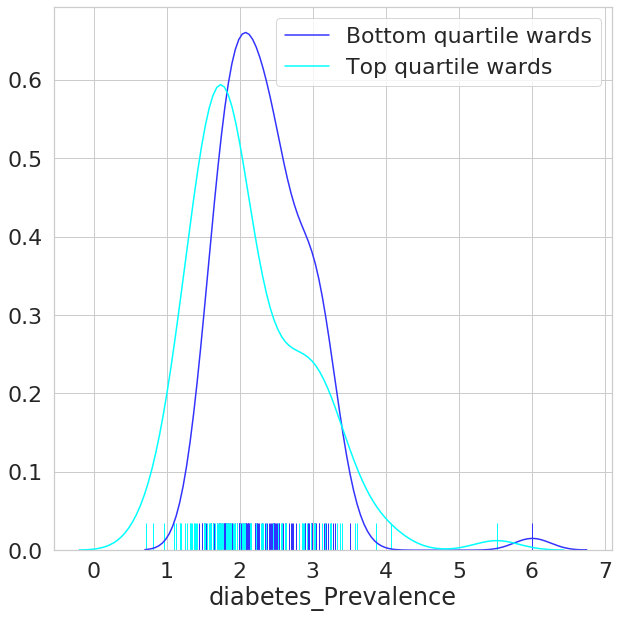

In [230]:

bottom_quartile = data[data['green_residual_quart'].cat.codes == 0]
top_quartile = data[data['green_residual_quart'].cat.codes == 3] 
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(bottom_quartile['diabetes_Prevalence'],hist=False, rug=True,label="Bottom quartile wards",ax=ax)
sns.distplot(top_quartile['diabetes_Prevalence'],hist=False, rug=True,label="Top quartile wards",ax=ax)

In [231]:
bottom_quartile

,Unnamed: 0_x,green_score,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,LCM_grass_pct,LCM_tree_pct,LCM_urban_pct,UA_Public Greenery PCT,UA_Forests PCT,...,Persons per household,All_jsa,Median 2012/13,Sex_ratio,f_alcohol,quantile_Sex_ratio,quantile_avg_age,Predicted_household,Green_residuals,green_residual_quart
1,1,41.700520,E05000571,E05000571,0.391747,0.095716,0.030845,0.734149,0.314715,0.000000,...,2.5,0.530168,32330,0.933078,0.035251,1st,2nd,1.615867,-0.078987,"(-0.4, -0.07]"
5,5,29.981620,E05000627,E05000627,0.397799,0.130412,0.018213,0.829897,0.304956,0.000000,...,2.5,0.571784,51420,1.089117,0.057156,4th,2nd,1.035857,-0.167498,"(-0.4, -0.07]"
6,6,17.689080,E05000046,E05000046,0.320848,0.046790,0.014695,0.925754,0.103816,0.000000,...,2.6,0.435781,30170,0.998440,0.030323,3rd,1st,1.887043,-0.191634,"(-0.4, -0.07]"
7,7,38.250920,E05000214,E05000214,0.414144,0.054701,0.206838,0.733713,0.333710,0.000000,...,2.6,0.431828,31540,0.959162,0.024491,2nd,1st,2.230245,-0.102720,"(-0.4, -0.07]"
9,9,27.673880,E05000216,E05000216,0.341743,0.075073,0.077988,0.832847,0.245057,0.000000,...,2.5,0.481667,37940,0.952822,0.028012,2nd,2nd,1.998691,-0.113471,"(-0.4, -0.07]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,405,4.922967,E05000640,E05000640,0.250468,0.019284,0.001377,0.966942,0.156482,0.000000,...,2.3,0.545796,45660,0.979533,0.026657,3rd,2nd,1.673432,-0.131045,"(-0.4, -0.07]"
411,411,4.903682,E05000648,E05000648,0.189089,0.000000,0.008641,0.981567,0.023542,0.000000,...,2.3,0.454346,32390,0.964075,0.025365,2nd,2nd,1.928425,-0.092313,"(-0.4, -0.07]"
416,416,55.166580,E05000253,E05000253,0.478367,0.189284,0.018338,0.766863,0.296646,0.000000,...,2.4,0.479093,30890,0.925911,0.029323,1st,2nd,1.631688,-0.214979,"(-0.4, -0.07]"
420,420,46.711350,E05000314,E05000314,0.532996,0.351005,0.053543,0.530275,0.099933,0.094372,...,2.3,0.419218,29560,0.891774,0.024569,1st,3rd,1.916857,-0.116507,"(-0.4, -0.07]"


In [232]:
# for name , group in data.groupby('green_residual_quart'):
#     sns.set(font_scale=2) 
#     ax = sns.jointplot(x=group['Green_residuals'], y=group['depression_Prevalence'], kind='regression',height=10);
#     plt.xlabel( 'Residuals Quartile' + str(name))
#     plt.ylabel('Depression prevalence')
#     ax.annotate(pearsonr)

In [233]:
np.corrcoef(predictions_2,Y[:,0])

array([[1., 1.],
       [1., 1.]])

In [234]:
np.corrcoef(predictions_green,Y_green_model[:,0])

array([[1.        , 0.84357387],
       [0.84357387, 1.        ]])

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


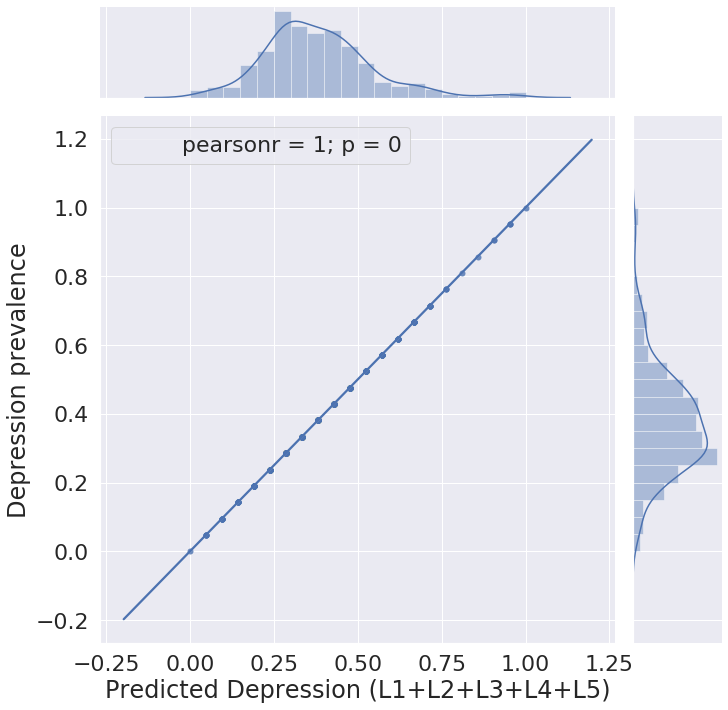

In [235]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_2, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L3+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

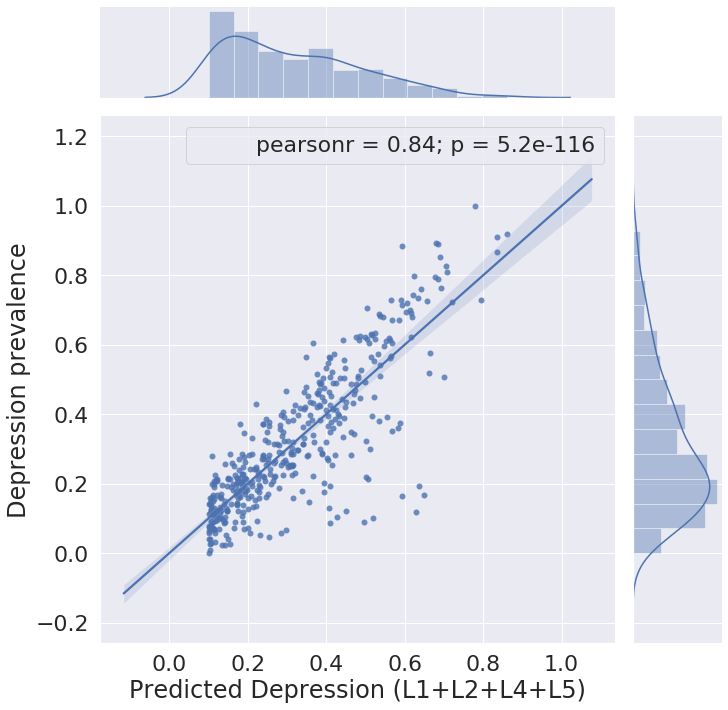

In [236]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_green, y=Y_green_model[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

In [114]:
residuals_with_green = np.array([predictions_2[k] - Y[k,0] for k in range(len(predictions_2))] , dtype = np.float32)

In [115]:
residuals_without_green = np.array([predictions[k] - Y[k,0] for k in range(len(predictions))] , dtype = np.float32)

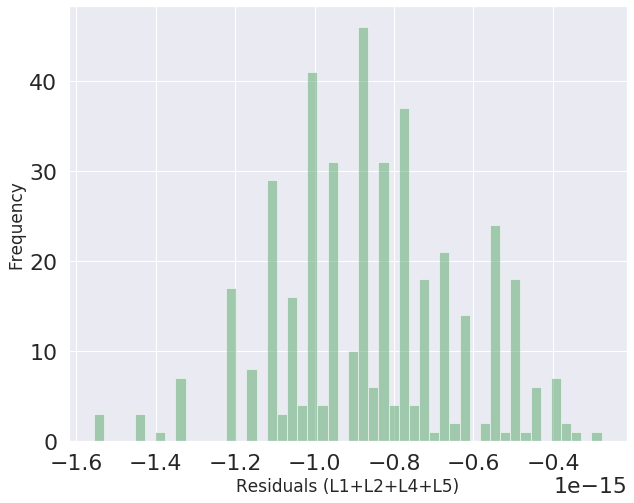

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('Residuals (L1+L2+L4+L5)',fontsize=17)
n1 , bins1 , patches1 = plt.hist(residuals_without_green, 50, facecolor='g', alpha=0.5)
# n2 , bins2 , patches2 = plt.hist(residuals_with_green, 50, facecolor='b', alpha=0.5)
# n2 , bins2 , patches2 = plt.hist(Y[:,0], 50, facecolor='r', alpha=0.75)
plt.show()

In [117]:
results_df = {'GSS_CODE':[] , 'Normalized_depression' :[] ,'Predict_L1':[] , 'Predict_L2':[] , 'Residual_L1':[]}
for index, row in data.iterrows():
    results_df['GSS_CODE'].append(row['GSS_CODE'])
    results_df['Normalized_depression'].append(Y[index][0])
    results_df['Predict_L1'].append(predictions[index])
    results_df['Predict_L2'].append(predictions_2[index])
    results_df['Residual_L1'].append(residuals_without_green[index])
results = pd.DataFrame.from_dict(results_df)
results.head()

,GSS_CODE,Normalized_depression,Predict_L1,Predict_L2,Residual_L1
0,E05000420,0.285714,0.285714,0.285714,-1.165734e-15
1,E05000571,0.380952,0.380952,0.380952,-5.551115e-16
2,E05000570,0.238095,0.238095,0.238095,-3.608225e-16
3,E05000572,0.380952,0.380952,0.380952,-4.996004e-16
4,E05000620,0.190476,0.190476,0.190476,-9.436896e-16


In [118]:
green = np.array(X_prime[:,0],dtype = np.float32)

In [119]:
green.shape, residuals_with_green.shape

((424,), (424,))

In [120]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=green, y=residuals, kind='regression',height=10);
plt.xlabel('GLUD_Area of Greenspace PCT')
plt.ylabel('Residuals of the linear model')
ax.annotate(pearsonr)

NameError: name 'residuals' is not defined

In [121]:
from sklearn import linear_model

In [122]:
df = data[X_dims_2]

In [123]:
df.head()

,avg_age,IMD,people_per_sq_km,All_jsa,Median 2012/13,Persons per household,weight,h_nutrients_calories_norm
0,33.195192,8.91957,14246.666667,0.557674,32220,2.3,0.717053,0.621350
1,34.208704,41.70052,5918.048780,0.530168,32330,2.5,0.183695,0.571767
2,40.219281,18.26981,6259.883721,0.509148,37960,2.2,0.100694,0.546861
3,37.033810,27.56138,6597.948718,0.510026,40610,2.5,0.086853,0.552541
4,35.017963,41.44914,6087.197232,0.618008,39580,2.1,0.452839,0.786335


In [124]:
len(df)

424

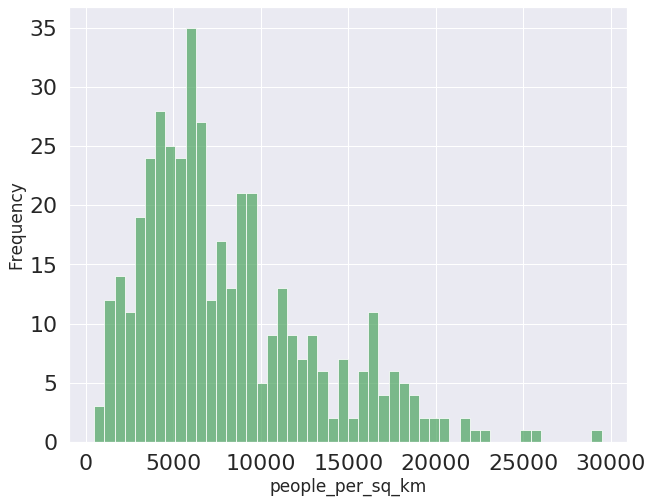

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('people_per_sq_km',fontsize=17)
n, bins, patches = plt.hist(df['people_per_sq_km'].values, 50, facecolor='g', alpha=0.75)
plt.show()

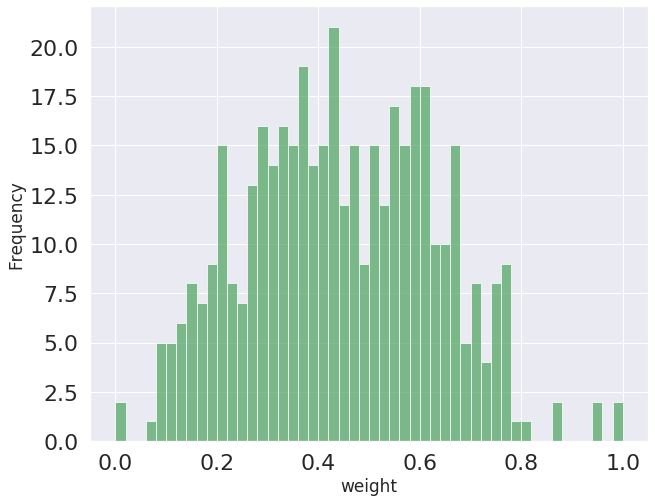

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('weight',fontsize=17)
n, bins, patches = plt.hist(df['weight'].values, 50, facecolor='g', alpha=0.75)
plt.show()

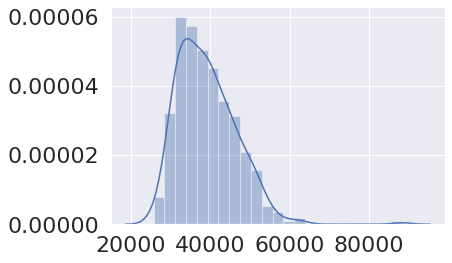

In [127]:
sns.distplot(np.array(df['Median 2012/13'].values , dtype=np.float32))

In [128]:
# import statsmodels.api as sm
# X_dims =  ['GLUD_Area of Greenspace PCT']
# Y_dims = ['TreePixelDensity']


# X = np.array(data[X_dims].values,dtype=np.float32)
# Y = np.array(data[Y_dims].values,dtype=np.float32)
# min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# Y = min_max_scaler.fit_transform(Y)
# X = sm.add_constant(X)

In [129]:
wards= data[['GSS_CODE','LCM_tree_pct','GLUD_Area of Greenspace PCT','TreeScore']]

In [130]:
wards

,GSS_CODE,LCM_tree_pct,GLUD_Area of Greenspace PCT,TreeScore
0,E05000420,0.000000,0.142967,9.871684
1,E05000571,0.030845,0.391747,5.046705
2,E05000570,0.007533,0.112290,7.005457
3,E05000572,0.015136,0.254884,3.520658
4,E05000620,0.014513,0.273367,2.648444
...,...,...,...,...
419,E05000257,0.002592,0.102392,10.825650
420,E05000314,0.053543,0.532996,2.924777
421,E05000438,0.012964,0.352056,11.374595
422,E05000439,0.023893,0.147625,7.031204


In [131]:
model_green = sm.OLS(Y, X).fit()
predictions_GSV_sat = model_green.predict(X)

In [132]:
model_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.633e+30
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:20:23   Log-Likelihood:                 14092.
No. Observations:                 424   AIC:                        -2.817e+04
Df Residuals:                     415   BIC:                        -2.813e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-16    5.7e-16      0.584      0.559   -7.87e-16    1.45e-15
x1                  0   3.23e-16          0      1.000   -6.35e-16    6.35e-16
x2         -1.665e-16   3.75e-16     -0.444      0.658   -9.04e-16    5.71e-16
x3         -4.059e-16    4.8e-16     -0.846      0.398   -1.35e-15    5.37e-16
x4         -5.274e-16   3.85e-16     -1.368      0.172   -1.28e-15     2.3e-16
x5         -1.665e-16   5.64e-16     -0.295      0.768   -1.27e-15    9.41e-16
x6             1.0000   4.42e-16   2.26e+15      0.000       1.000       1.000
x7         -1.027e-15   3.08e-16     -3.338      0.001   -1.63e-15   -4.22e-16
x8         -1.943e-16    5.4e-16     -0.360      0.719   -1.26e-15    8.67e-16
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.311
Skew:                           0.066   Prob(JB):                        0.856
Kurtosis:                       2.993   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
Y.shape

(424, 1)

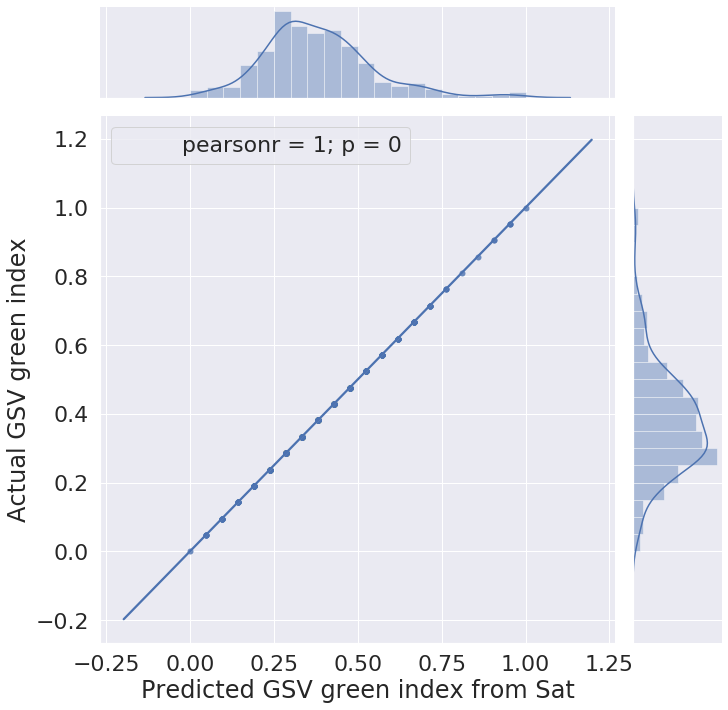

In [134]:

sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_GSV_sat, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted GSV green index from Sat')
plt.ylabel('Actual GSV green index')
ax.annotate(pearsonr)


In [135]:
residuals_sat = np.array([predictions_GSV_sat[k] - Y[k,0] for k in range(len(predictions_GSV_sat))] , dtype = np.float32)

In [136]:
wards['residuals'] = residuals_sat

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
wards['predicted'] = predictions_GSV_sat

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
wards['actual_scaled'] = (wards['TreePixelDensity']-df['TreePixelDensity'].min())/(df['TreePixelDensity'].max()-df['TreePixelDensity'].min())

KeyError: 'TreePixelDensity'

In [139]:
wards

,GSS_CODE,LCM_tree_pct,GLUD_Area of Greenspace PCT,TreeScore,residuals,predicted
0,E05000420,0.000000,0.142967,9.871684,-1.165734e-15,0.285714
1,E05000571,0.030845,0.391747,5.046705,-5.551115e-16,0.380952
2,E05000570,0.007533,0.112290,7.005457,-3.608225e-16,0.238095
3,E05000572,0.015136,0.254884,3.520658,-4.996004e-16,0.380952
4,E05000620,0.014513,0.273367,2.648444,-9.436896e-16,0.190476
...,...,...,...,...,...,...
419,E05000257,0.002592,0.102392,10.825650,-8.881784e-16,0.285714
420,E05000314,0.053543,0.532996,2.924777,-4.996004e-16,0.285714
421,E05000438,0.012964,0.352056,11.374595,-1.026956e-15,0.238095
422,E05000439,0.023893,0.147625,7.031204,-9.159340e-16,0.238095


In [ ]:
sns.distplot(residuals_sat)

In [ ]:
wards['residual_quart'] = pd.qcut(wards['residuals'], q=4, precision=0)

In [ ]:
wards['residual_quart'].unique()

In [ ]:
for name , group in wards.groupby('residual_quart'):
    sns.set(font_scale=2) 
    ax = sns.jointplot(x=group['actual_scaled'], y=group['predicted'], kind='regression',height=10);
    plt.xlabel('Predicted GSV green index from Sat: Quartile' + str(name))
    plt.ylabel('Actual GSV green index')
    ax.annotate(pearsonr)


In [146]:
import geopandas as gpd

In [147]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

In [148]:
wards_shape.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."


In [149]:
wards_with_data = pd.merge(wards_shape , wards , left_on='CODE', right_on = 'GSS_CODE')

KeyError: 'residual_quart'

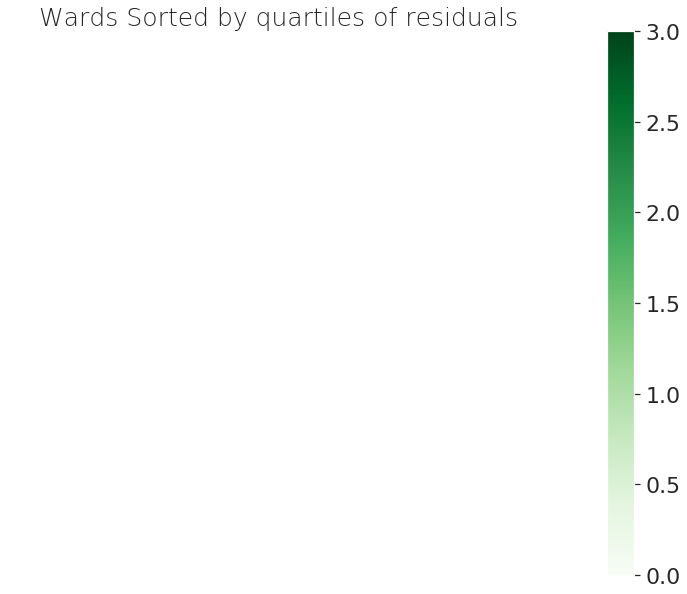

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Wards Sorted by quartiles of residuals', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=3))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='residual_quart', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GSV green score by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['TreePixelDensity'].min(), vmax=wards_with_data['TreePixelDensity'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='TreePixelDensity', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('LCM_tree_pct by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['LCM_tree_pct'].min(), vmax=wards_with_data['LCM_tree_pct'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='LCM_tree_pct', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GLUD_Area of Greenspace PCT by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['GLUD_Area of Greenspace PCT'].min(), vmax=wards_with_data['GLUD_Area of Greenspace PCT'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='GLUD_Area of Greenspace PCT', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
wards_shape.plot(ax=ax)